# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

# IMPORTING DATA

In [3]:
data_coca = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [4]:
data_coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# DATA UNDERSTANDING

In [5]:
data_coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
data_coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
data_coca.shape

(42, 2)

In [8]:
data_coca.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [9]:
data_coca.columns

Index(['Quarter', 'Sales'], dtype='object')

# Relationship Analysis

In [10]:
impor`t seaborn as sns

SyntaxError: invalid syntax (1590470508.py, line 1)

In [ ]:
sns.pairplot(data_coca, height = 5)

# Univariate Analysis

In [ ]:
sns.distplot(data_coca['Sales'], bins=5)
sns.catplot(x= 'Sales',kind ='box', data=data_coca)
sns.relplot(data=data_coca, kind="line")
g = sns.pairplot(data_coca, diag_kind="kde", height = 5)
g.map_lower(sns.kdeplot, levels=4, color=".2")

# Splitting Data

In [11]:
Train = data_coca.head(30)
Test = data_coca.tail(12)

# Moving Average

In [13]:
import matplotlib.pyplot as plt

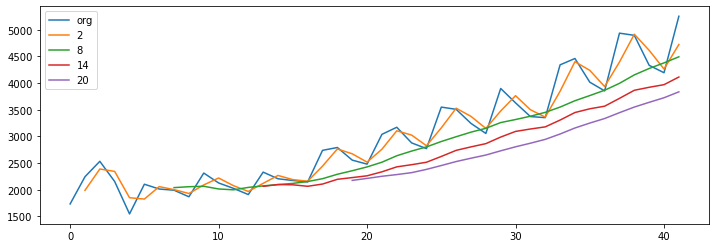

In [14]:
plt.figure(figsize=(12,4))
data_coca.Sales.plot(label="org")
for i in range(2,24,6):
    data_coca["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

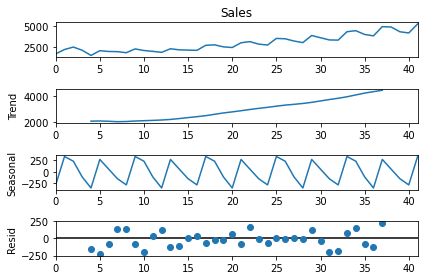

In [16]:
decompose_ts_add = seasonal_decompose(data_coca.Sales,period=8)
decompose_ts_add.plot()
plt.show()

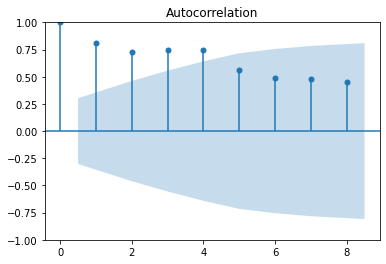

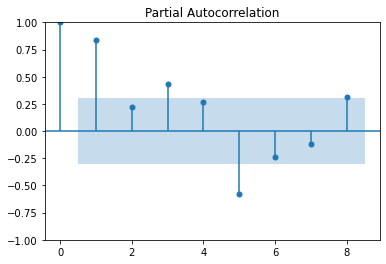

In [17]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data_coca.Sales,lags=8)
tsa_plots.plot_pacf(data_coca.Sales,lags=8)
plt.show()

# Evaluation Metric MAPE

In [19]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [20]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

22.04676239130592

# Holt Method

In [21]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

11.213842666521865

# Holts winter exponential smoothing with additive seasonality and additive trend

In [22]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

4.847255423617383

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [23]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

7.242999886510941

## Final Model by combining train and test

In [25]:
hwe_model_add_add = ExponentialSmoothing(data_coca["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [26]:
hwe_model_add_add.forecast(10)

42    5049.222801
43    4919.443315
44    4893.633023
45    5606.738552
46    5653.485398
47    5390.876912
48    5311.980684
49    6060.351171
50    6128.595124
51    5854.478006
dtype: float64